# Implementation sOf ANN using Keras

In [1]:
!pip install tensorflow

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
!pip install keras
import keras

In [11]:
# Checking version Of Tensorflow and Keras
print(f"Tensorflow Version {tf.__version__}")
print(keras.__version__)

Tensorflow Version 2.18.0
3.8.0


# Creating a simple clasifier using keras on MNIST data

In [12]:
mnist = tf.keras.datasets.mnist
(X_train_full , y_train_full),(X_test ,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
print(f"data type  of X_train_full:{X_train_full.dtype},\n shape of X_train_full:{X_train_full.shape}")

data type  of X_train_full:uint8,
 shape of X_train_full:(60000, 28, 28)


In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
len(X_test[1][0])

28

In [21]:
# Create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing by 255 (since pixel values are in 0–255 range)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scale the test set as well
X_test = X_test / 255.0


In [22]:
len(X_train_full[:5000])

5000

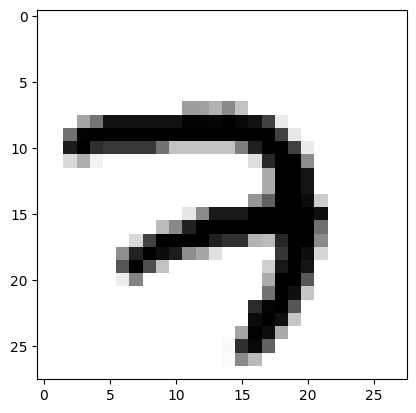

In [23]:
#lets view some data
plt.imshow(X_train[0],cmap="binary")

ye jo upar image dikh r hai ye humko dikh ri hai lekin image computer ko dikhegi iska code 
niche wali line me likha hai

<Axes: >

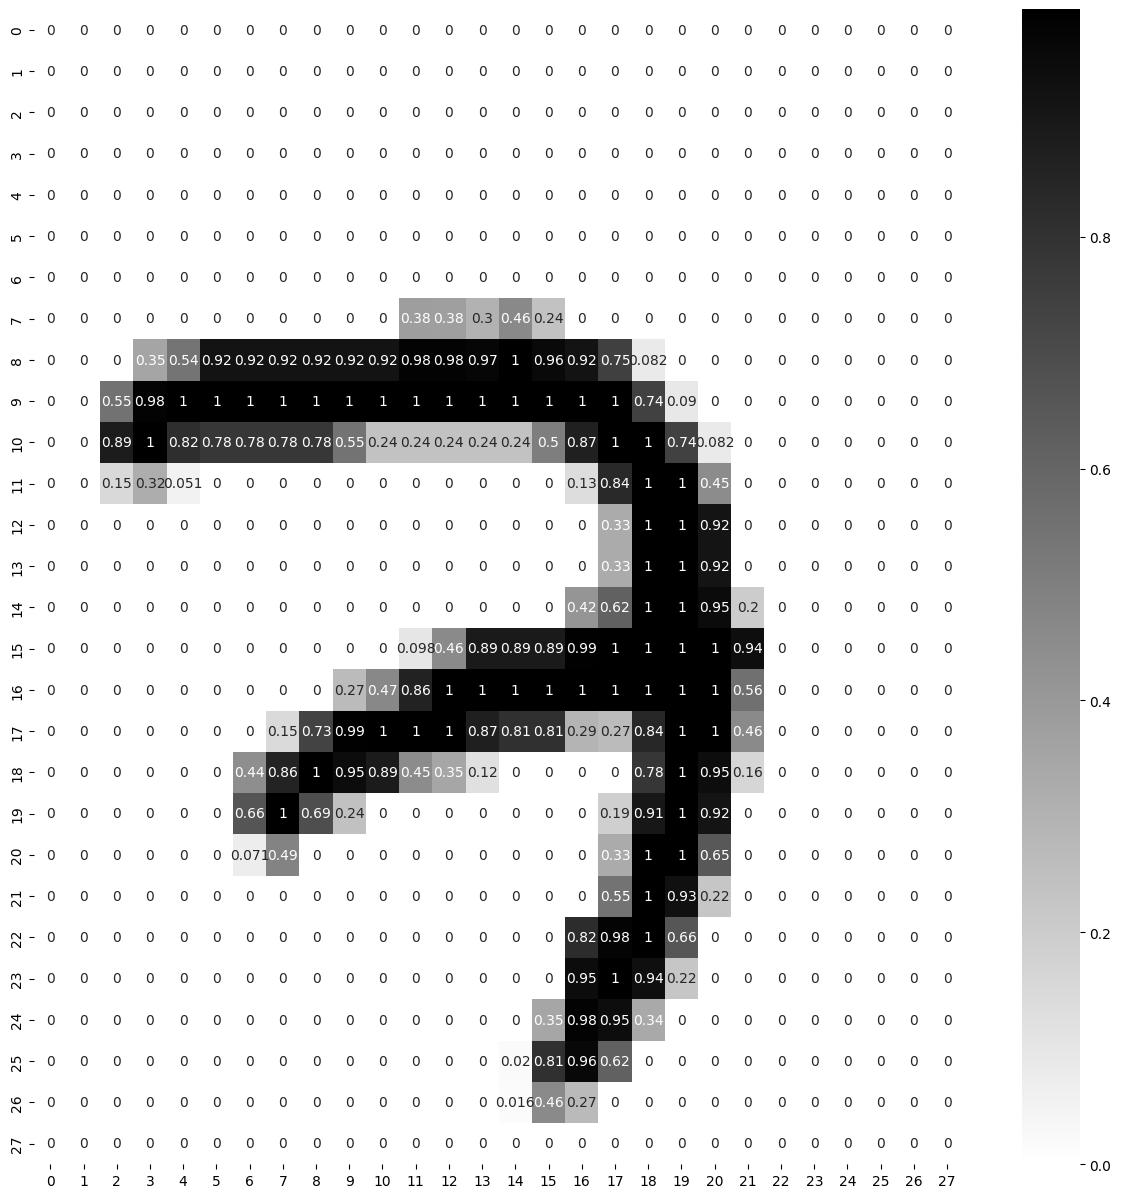

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap="binary")

In [25]:
28*28

784

In [27]:
#Creating layers of ANN
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28] , name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu",name="hiddenLayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")
    
]
model_clf=tf.keras.models.Sequential(LAYERS)


2025-07-27 05:38:10.812146: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [28]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenlayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [29]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#firstlayer_secondlayer*bias
784*300+300 , 300*100+100 , 100*10+10

(235500, 30100, 1010)

In [31]:
#Toatl Parameters to be trained
sum((235500, 30100, 1010))

266610

In [33]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [34]:
len(hidden1.get_weights()[1])

300

In [35]:
hidden1.get_weights()

[array([[ 0.00408135,  0.01772135, -0.03023728, ..., -0.04182847,
         -0.06883355, -0.01861925],
        [ 0.01812929,  0.06336609,  0.01277196, ...,  0.03619849,
          0.06494524,  0.03212441],
        [-0.02039881,  0.00487814,  0.04248779, ..., -0.00334335,
         -0.00163259,  0.01192725],
        ...,
        [ 0.06770106, -0.01794675, -0.06417509, ..., -0.06737944,
          0.01031758,  0.07023032],
        [ 0.06417041,  0.07015014,  0.02057192, ..., -0.05684175,
          0.03565126,  0.03321733],
        [ 0.01671895,  0.00299808, -0.0152622 , ..., -0.0714427 ,
          0.05626793, -0.03750809]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [36]:
weights,biases=hidden1.get_weights()

In [37]:
print("shape\n",weights.shape,"\n")

shape
 (784, 300) 



In [40]:
LOSS_FUNCTION="sparse_categorical_crossentropy"#use=>tf.Losses.sparse_categorical_crossentropy
OPTIMIZER="SGD" #or use with custom learning rate=>tf.keras.optimizers.SGD(0.02)
METRICS=["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
                 optimizer=OPTIMIZER,
                 metrics=METRICS)

In [41]:
#training

EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)

history=model=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                           validation_data=VALIDATION_SET,batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7142 - loss: 1.0708 - val_accuracy: 0.9148 - val_loss: 0.3086
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9130 - loss: 0.3060 - val_accuracy: 0.9300 - val_loss: 0.2400
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9305 - loss: 0.2470 - val_accuracy: 0.9416 - val_loss: 0.2016
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9414 - loss: 0.2035 - val_accuracy: 0.9484 - val_loss: 0.1800
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9484 - loss: 0.1836 - val_accuracy: 0.9546 - val_loss: 0.1576
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9560 - loss: 0.1554 - val_accuracy: 0.9616 - val_loss: 0.1434
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9613 - loss: 0.1376 - val_accuracy: 0.9644 - val_loss: 0.1313
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9643 - loss: 0.1276 

In [42]:
 history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.835055,0.629269,0.9148,0.308624
1,0.917309,0.288719,0.9300,0.240011
2,0.933091,0.235618,0.9416,0.201603
3,0.943855,0.199976,0.9484,0.180028
4,0.951091,0.174709,0.9546,0.157619
5,0.955291,0.154562,0.9616,0.143353
6,0.960655,0.138267,0.9644,0.131322
7,0.964818,0.124667,0.9678,0.124296
8,0.968255,0.113521,0.9670,0.119529
9,0.970327,0.103774,0.9702,0.108430


<Axes: >

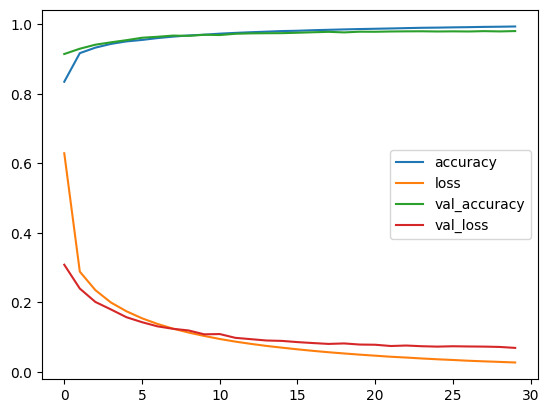

In [45]:
pd.DataFrame(history.history).plot()

In [46]:
model_clf.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0912 - loss: 2.5719


[2.5718493461608887, 0.08919999748468399]

In [47]:
x_new=X_test[:3]
#x_new

In [48]:
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [51]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.04 , 0.066, 0.064, 0.031, 0.052, 0.368, 0.088, 0.059, 0.146,
        0.086],
       [0.04 , 0.068, 0.065, 0.031, 0.049, 0.368, 0.095, 0.052, 0.15 ,
        0.081],
       [0.039, 0.068, 0.063, 0.031, 0.05 , 0.37 , 0.091, 0.055, 0.147,
        0.086]], dtype=float32)

In [52]:
y_prob

array([[0.03978201, 0.06593633, 0.06403805, 0.0308849 , 0.05180551,
        0.36848336, 0.08819482, 0.05898291, 0.14594698, 0.08594514],
       [0.03962857, 0.06804496, 0.06529301, 0.03075512, 0.04931024,
        0.36796615, 0.09518645, 0.05210408, 0.15027928, 0.0814322 ],
       [0.03885329, 0.06750845, 0.06319217, 0.03079863, 0.05033916,
        0.37035328, 0.0911084 , 0.05455345, 0.14706628, 0.08622681]],
      dtype=float32)

In [54]:
y_pred=np.argmax(y_prob,axis=-1)


In [55]:
y_pred

array([5, 5, 5])

In [56]:
actual

array([7, 2, 1], dtype=uint8)

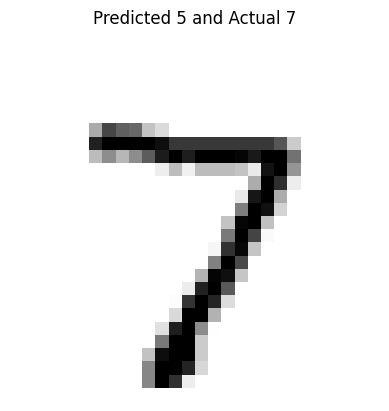

#######################


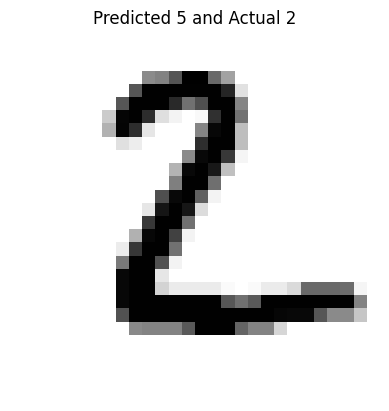

#######################


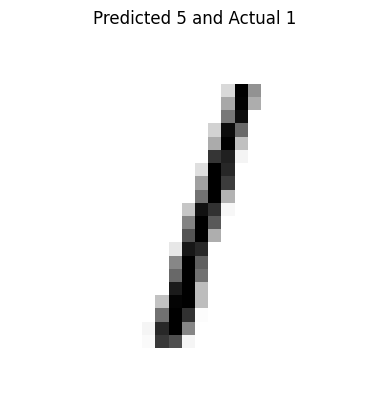

#######################


In [59]:
#plot

for data,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("#######################")
